In [8]:
from commpy.sequences import zcsequence
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import io

In [9]:
srs_seqs = io.loadmat('srsSeqs.mat')['srsSeqs']
srs_seqs_t = np.fft.ifft(srs_seqs)

<IPython.core.display.Javascript object>


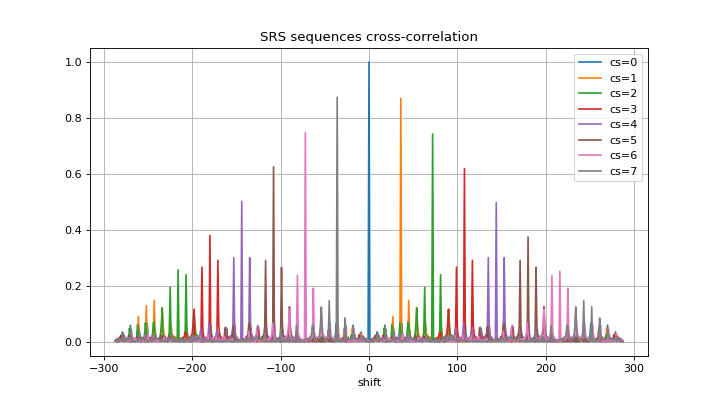

Text(0.5, 1.0, 'SRS sequences cross-correlation')

In [11]:
%matplotlib notebook

fig = plt.figure(figsize=(9, 5))

for cs in range(srs_seqs_t.shape[0]):
    corr = np.correlate(srs_seqs_t[0], srs_seqs_t[cs], mode='full')
    plt.plot(np.arange(corr.shape[0]) - (srs_seqs_t.shape[1] - 1), np.abs(corr))

    
plt.legend(['cs=' + str(cs) for cs in range(srs_seqs_t.shape[0])])
plt.grid(True)
plt.xlabel("shift")
plt.title("SRS sequences cross-correlation")

<IPython.core.display.Javascript object>


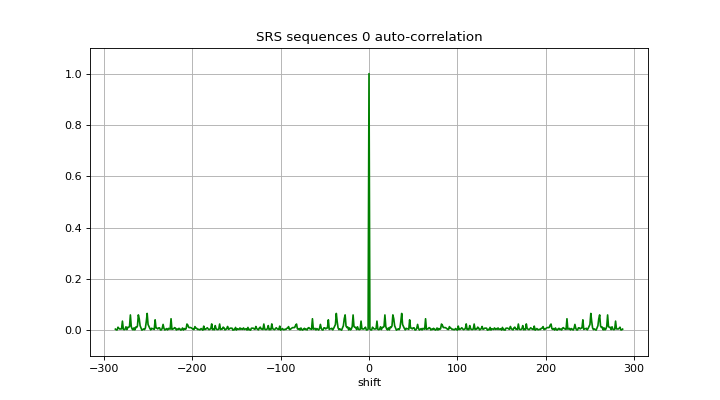

Text(0.5, 1.0, 'SRS sequences 0 auto-correlation')

In [13]:
%matplotlib notebook

fig = plt.figure(figsize=(9, 5))

plt.plot(np.arange(corr.shape[0]) - (srs_seqs_t.shape[1] - 1), 
         np.abs(np.correlate(srs_seqs_t[0], srs_seqs_t[0], mode='full')), 
         'g-')

plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.xlabel("shift")
plt.title("SRS sequences 0 auto-correlation")

<IPython.core.display.Javascript object>


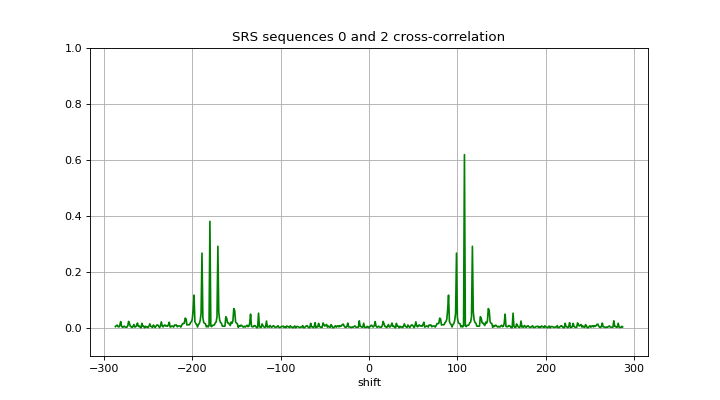

Text(0.5, 1.0, 'SRS sequences 0 and 2 cross-correlation')

In [15]:
%matplotlib notebook

fig = plt.figure(figsize=(9, 5))

plt.plot(np.arange(corr.shape[0]) - (srs_seqs_t.shape[1] - 1), 
         np.abs(np.correlate(srs_seqs_t[0], srs_seqs_t[3], mode='full')), 
         'g-')

plt.ylim(-0.1, 1)
plt.grid(True)
plt.xlabel("shift")
plt.title("SRS sequences 0 and 2 cross-correlation")

In [16]:
def periodic_corr(x, y):
    return np.fft.ifft(np.fft.fft(x) * np.fft.fft(y).conj())

<IPython.core.display.Javascript object>


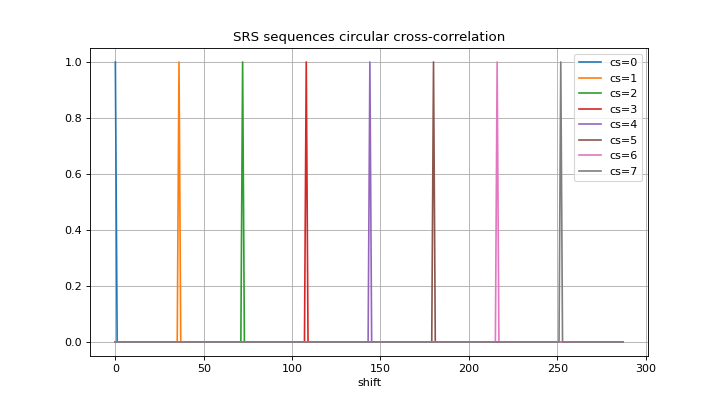

Text(0.5, 1.0, 'SRS sequences circular cross-correlation')

In [17]:
%matplotlib notebook

fig = plt.figure(figsize=(9, 5))

for cs in range(srs_seqs_t.shape[0]):
    corr = periodic_corr(srs_seqs_t[0], srs_seqs_t[cs])
    plt.plot(np.arange(corr.shape[0]), np.abs(corr))

    
plt.legend(['cs=' + str(cs) for cs in range(srs_seqs_t.shape[0])])
plt.grid(True)
plt.xlabel("shift")
plt.title("SRS sequences circular cross-correlation")